In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
import pandas as pd
import os
path='/content/drive/MyDrive/CVSfileHecktor'
pathf=os.path.join(path,'feature_toplast.csv')
topfeature=pd.read_csv(pathf)
labdf='/content/drive/MyDrive/CVSfileHecktor/hecktor2021_patient_endpoint_training.csv'
labeldata=pd.read_csv(labdf)
P=labeldata['Progression']
T=labeldata['Progression free survival']
topfeature.insert(145,'Progression',P)
topfeature.insert(146,'Progression free survival',T)

In [4]:
topfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,Progression,Progression free survival
0,CHGJ007,0.556195,0.630514,0.649517,0.670199,0.684146,0.689793,0.693167,0.691553,0.689560,0.684408,0.680772,0.674504,0.671838,0.669804,0.672577,0.671733,0.673609,0.670526,0.671942,0.668317,0.668828,0.664833,0.666613,0.662773,0.663500,0.659862,0.661884,0.659117,0.661828,0.659906,0.663653,0.661990,0.665379,0.663267,0.666732,0.664954,0.668216,0.666007,0.668653,...,0.643871,0.641917,0.645441,0.646745,0.653097,0.656185,0.663150,0.664989,0.669318,0.668560,0.671676,0.670501,0.673276,0.672095,0.675189,0.673409,0.675830,0.672661,0.673630,0.669551,0.668295,0.662030,0.661043,0.656770,0.659392,0.659075,0.663098,0.660999,0.663911,0.663373,0.667230,0.664840,0.666851,0.662340,0.661955,0.649905,0.640598,0.565736,1,310
1,CHGJ008,0.592046,0.634490,0.648686,0.655980,0.662008,0.662838,0.666696,0.664860,0.666849,0.664151,0.666514,0.663970,0.666888,0.665187,0.668139,0.664445,0.665979,0.662284,0.664113,0.660444,0.661614,0.657872,0.658798,0.655233,0.657227,0.655832,0.660301,0.660027,0.664801,0.665156,0.670255,0.670316,0.674805,0.674370,0.678272,0.677315,0.681618,0.681430,0.684976,...,0.681820,0.680303,0.684801,0.683815,0.687173,0.683603,0.685667,0.681435,0.682624,0.677162,0.678293,0.673558,0.674869,0.669716,0.670753,0.665893,0.666731,0.662338,0.663980,0.661062,0.663881,0.661769,0.664642,0.662192,0.665071,0.664109,0.667993,0.666808,0.670633,0.667485,0.669053,0.665281,0.666008,0.662107,0.662144,0.654704,0.650621,0.571920,0,2037
2,CHGJ010,0.632668,0.604290,0.604099,0.614160,0.627324,0.632664,0.639187,0.639325,0.642536,0.641934,0.645848,0.645446,0.649372,0.649209,0.654365,0.655574,0.662471,0.664776,0.671547,0.672508,0.680778,0.682146,0.687697,0.686655,0.692522,0.691583,0.696583,0.695229,0.701014,0.700658,0.706457,0.705926,0.711822,0.710747,0.715073,0.713266,0.717813,0.716624,0.720247,...,0.725770,0.723562,0.727641,0.724992,0.727331,0.722525,0.724023,0.718111,0.717881,0.711037,0.711419,0.704837,0.704053,0.697385,0.698429,0.693522,0.694893,0.690066,0.693095,0.688908,0.689314,0.682013,0.682166,0.675108,0.671866,0.663721,0.662551,0.655447,0.653957,0.646054,0.643575,0.634870,0.631858,0.623504,0.620044,0.609359,0.623285,0.606819,0,1917
3,CHGJ013,0.601331,0.616904,0.623113,0.638120,0.650336,0.654655,0.659938,0.660182,0.662686,0.661551,0.665197,0.665014,0.668810,0.669257,0.673925,0.673140,0.677709,0.677199,0.681481,0.679531,0.684089,0.682502,0.686736,0.684921,0.689950,0.689048,0.694367,0.693201,0.698962,0.698565,0.704116,0.702815,0.708356,0.707966,0.713365,0.712641,0.718061,0.717193,0.720846,...,0.706187,0.703369,0.705913,0.703237,0.704999,0.701132,0.702816,0.698894,0.700120,0.695923,0.698351,0.694632,0.695955,0.690953,0.692645,0.688246,0.689705,0.684987,0.687038,0.682976,0.684396,0.679220,0.679592,0.674542,0.675079,0.669458,0.669648,0.665495,0.666202,0.661731,0.662130,0.656300,0.654976,0.648881,0.645502,0.632300,0.636359,0.565263,0,1377
4,CHGJ015,0.608181,0.588677,0.588416,0.604612,0.619835,0.627126,0.633934,0.634389,0.637154,0.637462,0.644086,0.645344,0.650330,0.654069,0.661048,0.661909,0.669025,0.669644,0.675392,0.675096,0.681026,0.680692,0.685409,0.683627,0.688399,0.687211,0.691541,0.689720,0.694675,0.693816,0.698912,0.697939,0.703327,0.702723,0.707780,0.706765,0.711682,0.710293,0.714122,...,0.704819,0.702660,0.705190,0.702714,0.704402,0.700233,0.701185,0.696330,0.695642,0.689338,0.688924,0.684190,0.684456,0.679500,0.680254,0.677204,0.680044,0.677415,0.681248,0.679343,0.682259,0.677881,0.680105,0.674944,0.674887,0.666937,0.665217,0.657672,0.656543,0.648416,0.645380,0.635831,0.632811,0.625115,0.62228

In [5]:
topfeature.rename(columns={'Progression free survival':'target'}, inplace=True)

In [6]:
topfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,Progression,target
0,CHGJ007,0.556195,0.630514,0.649517,0.670199,0.684146,0.689793,0.693167,0.691553,0.689560,0.684408,0.680772,0.674504,0.671838,0.669804,0.672577,0.671733,0.673609,0.670526,0.671942,0.668317,0.668828,0.664833,0.666613,0.662773,0.663500,0.659862,0.661884,0.659117,0.661828,0.659906,0.663653,0.661990,0.665379,0.663267,0.666732,0.664954,0.668216,0.666007,0.668653,...,0.643871,0.641917,0.645441,0.646745,0.653097,0.656185,0.663150,0.664989,0.669318,0.668560,0.671676,0.670501,0.673276,0.672095,0.675189,0.673409,0.675830,0.672661,0.673630,0.669551,0.668295,0.662030,0.661043,0.656770,0.659392,0.659075,0.663098,0.660999,0.663911,0.663373,0.667230,0.664840,0.666851,0.662340,0.661955,0.649905,0.640598,0.565736,1,310
1,CHGJ008,0.592046,0.634490,0.648686,0.655980,0.662008,0.662838,0.666696,0.664860,0.666849,0.664151,0.666514,0.663970,0.666888,0.665187,0.668139,0.664445,0.665979,0.662284,0.664113,0.660444,0.661614,0.657872,0.658798,0.655233,0.657227,0.655832,0.660301,0.660027,0.664801,0.665156,0.670255,0.670316,0.674805,0.674370,0.678272,0.677315,0.681618,0.681430,0.684976,...,0.681820,0.680303,0.684801,0.683815,0.687173,0.683603,0.685667,0.681435,0.682624,0.677162,0.678293,0.673558,0.674869,0.669716,0.670753,0.665893,0.666731,0.662338,0.663980,0.661062,0.663881,0.661769,0.664642,0.662192,0.665071,0.664109,0.667993,0.666808,0.670633,0.667485,0.669053,0.665281,0.666008,0.662107,0.662144,0.654704,0.650621,0.571920,0,2037
2,CHGJ010,0.632668,0.604290,0.604099,0.614160,0.627324,0.632664,0.639187,0.639325,0.642536,0.641934,0.645848,0.645446,0.649372,0.649209,0.654365,0.655574,0.662471,0.664776,0.671547,0.672508,0.680778,0.682146,0.687697,0.686655,0.692522,0.691583,0.696583,0.695229,0.701014,0.700658,0.706457,0.705926,0.711822,0.710747,0.715073,0.713266,0.717813,0.716624,0.720247,...,0.725770,0.723562,0.727641,0.724992,0.727331,0.722525,0.724023,0.718111,0.717881,0.711037,0.711419,0.704837,0.704053,0.697385,0.698429,0.693522,0.694893,0.690066,0.693095,0.688908,0.689314,0.682013,0.682166,0.675108,0.671866,0.663721,0.662551,0.655447,0.653957,0.646054,0.643575,0.634870,0.631858,0.623504,0.620044,0.609359,0.623285,0.606819,0,1917
3,CHGJ013,0.601331,0.616904,0.623113,0.638120,0.650336,0.654655,0.659938,0.660182,0.662686,0.661551,0.665197,0.665014,0.668810,0.669257,0.673925,0.673140,0.677709,0.677199,0.681481,0.679531,0.684089,0.682502,0.686736,0.684921,0.689950,0.689048,0.694367,0.693201,0.698962,0.698565,0.704116,0.702815,0.708356,0.707966,0.713365,0.712641,0.718061,0.717193,0.720846,...,0.706187,0.703369,0.705913,0.703237,0.704999,0.701132,0.702816,0.698894,0.700120,0.695923,0.698351,0.694632,0.695955,0.690953,0.692645,0.688246,0.689705,0.684987,0.687038,0.682976,0.684396,0.679220,0.679592,0.674542,0.675079,0.669458,0.669648,0.665495,0.666202,0.661731,0.662130,0.656300,0.654976,0.648881,0.645502,0.632300,0.636359,0.565263,0,1377
4,CHGJ015,0.608181,0.588677,0.588416,0.604612,0.619835,0.627126,0.633934,0.634389,0.637154,0.637462,0.644086,0.645344,0.650330,0.654069,0.661048,0.661909,0.669025,0.669644,0.675392,0.675096,0.681026,0.680692,0.685409,0.683627,0.688399,0.687211,0.691541,0.689720,0.694675,0.693816,0.698912,0.697939,0.703327,0.702723,0.707780,0.706765,0.711682,0.710293,0.714122,...,0.704819,0.702660,0.705190,0.702714,0.704402,0.700233,0.701185,0.696330,0.695642,0.689338,0.688924,0.684190,0.684456,0.679500,0.680254,0.677204,0.680044,0.677415,0.681248,0.679343,0.682259,0.677881,0.680105,0.674944,0.674887,0.666937,0.665217,0.657672,0.656543,0.648416,0.645380,0.635831,0.632811,0.625115,0.622286,0.611055,0.621686

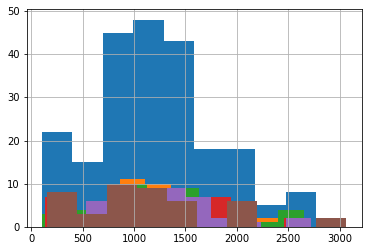

In [7]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = topfeature
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [8]:
df_train.to_csv('/content/drive/MyDrive/CVSfileHecktor/topfeature_fold.csv',index=False)

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


[23:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 655.4731351911855
[23:05:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 703.2933856810076
[23:05:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 698.208735872914
[23:05:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 615.5341968005811


In [9]:
# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
#event4=np.array(y_eventf)[4]

In [10]:
!pip install lifelines

     |████████████████████████████████| 348 kB 29.6 MB/s 
     |████████████████████████████████| 55 kB 5.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=1e561a0d1aca802467f9ed55c0fad1413683270378547082bf31da15363d36aa
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [15]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred,event)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1,event1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2,event2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3,event3)}')

Concordance index_XGB_fold1: 0.3659305993690852
Concordance index_XGB_fold2: 0.4607329842931937
Concordance index_XGB_fold3: 0.5710955710955711
Concordance index_XGB_fold4: 0.39556962025316456


In [16]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

Concordance index_XGB_fold1: 0.41919191919191917
Concordance index_XGB_fold2: 0.45151515151515154
Concordance index_XGB_fold3: 0.44747474747474747
Concordance index_XGB_fold4: 0.4665991902834008


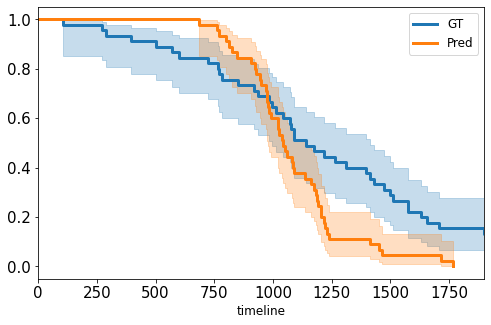

In [18]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, None, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, None, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

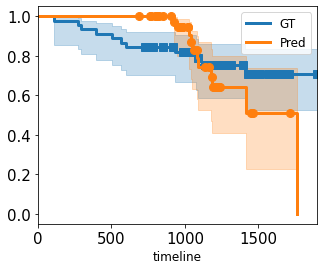

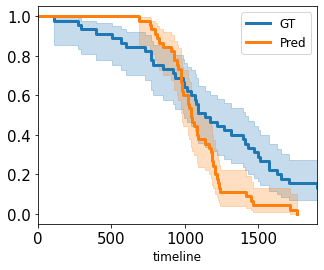

In [23]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(5,4))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(5,4))
## Fit the data into the model

kmf.fit(true1, None, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, None, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

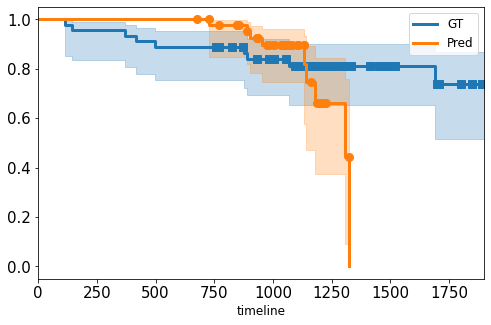

In [15]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

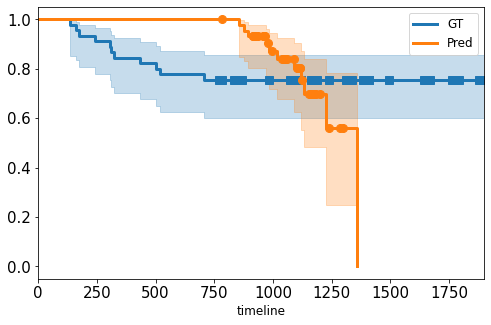

In [16]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

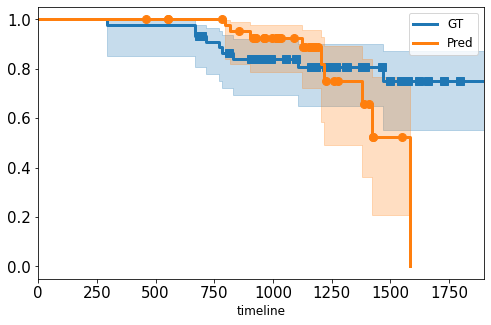

In [17]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [18]:
# Gradient boosting Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= GradientBoostingRegressor(n_estimators=700,random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

0 638.1241740284828
1 700.7613152137578
2 785.1773546878675
3 634.463184528069


In [20]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

Concordance index_XGB_fold1: 0.42525252525252527
Concordance index_XGB_fold2: 0.49696969696969695
Concordance index_XGB_fold3: 0.398989898989899
Concordance index_XGB_fold4: 0.49291497975708504


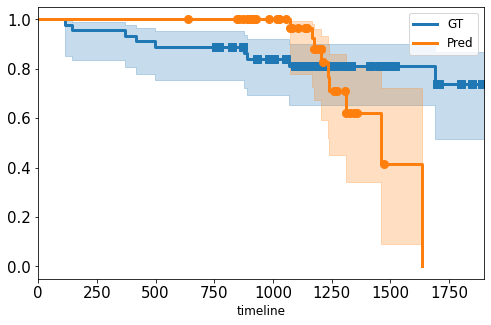

In [19]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

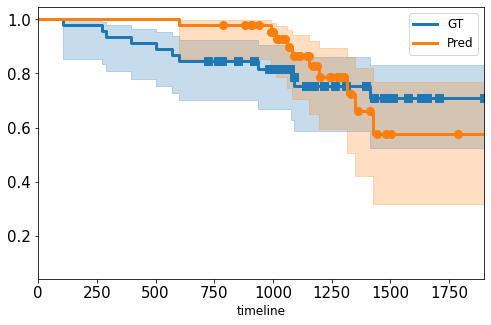

In [22]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

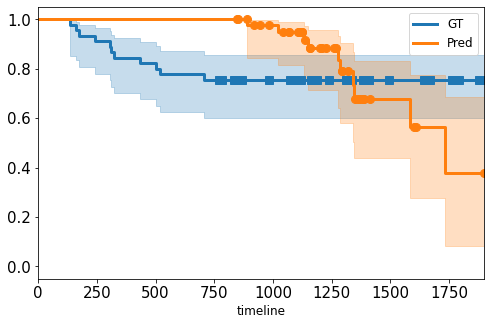

In [23]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

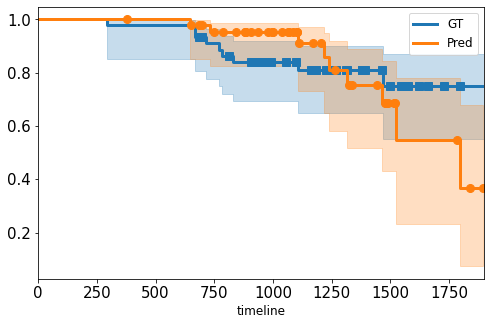

In [24]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [25]:
# Random Forest Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= RandomForestRegressor(random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

0 594.8665708804884
1 689.2319970469547
2 717.7509899710655
3 546.8325100125875
Concordance index_XGB_fold1: 0.4808080808080808
Concordance index_XGB_fold2: 0.4595959595959596
Concordance index_XGB_fold3: 0.39090909090909093
Concordance index_XGB_fold4: 0.4848178137651822


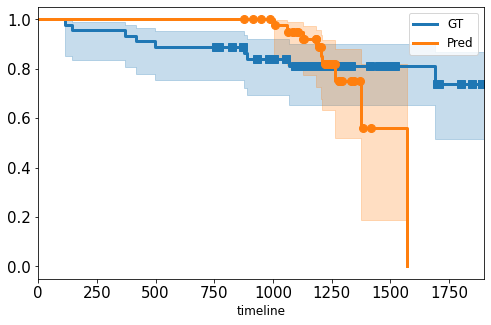

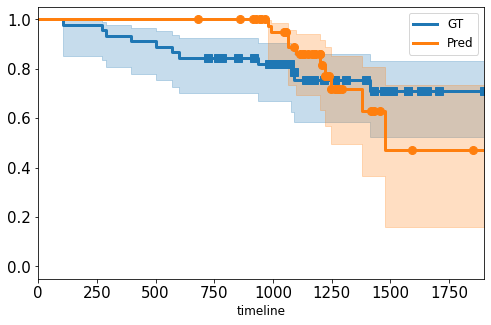

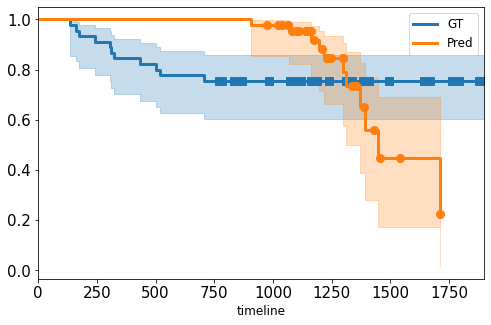

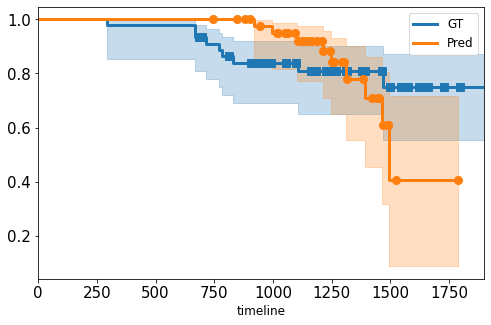

In [27]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 917.3985320822497
1 959.5466174767702
2 922.677866020663
3 836.9585944889322
Concordance index_XGB_fold1: 0.46060606060606063
Concordance index_XGB_fold2: 0.4535353535353535
Concordance index_XGB_fold3: 0.4954545454545455
Concordance index_XGB_fold4: 0.4185222672064777


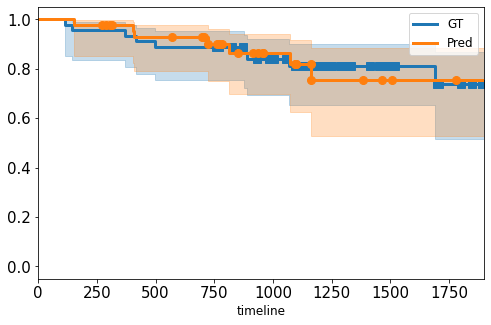

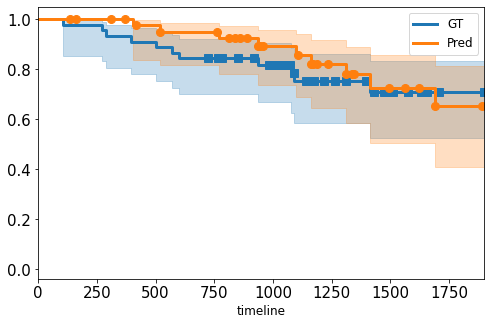

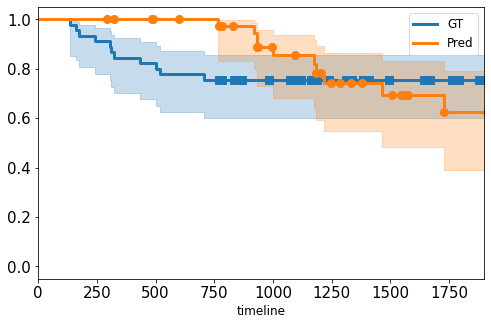

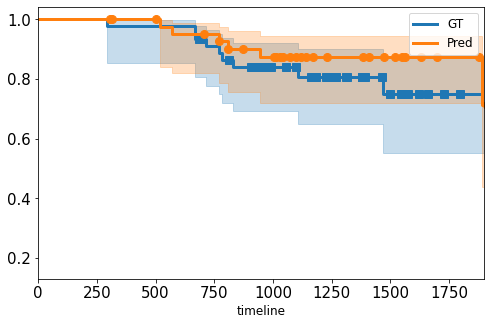

In [28]:
# Decision Tree Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= DecisionTreeRegressor(max_leaf_nodes=500, random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 609.192888531849
1 728.8624548553572
2 744.4653289665902
3 579.9934804767685
Concordance index_XGB_fold1: 0.4767676767676768
Concordance index_XGB_fold2: 0.45656565656565656
Concordance index_XGB_fold3: 0.3898989898989899
Concordance index_XGB_fold4: 0.45445344129554655


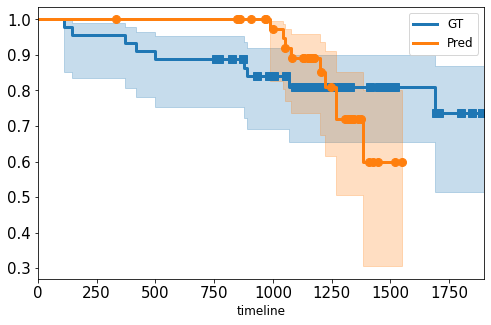

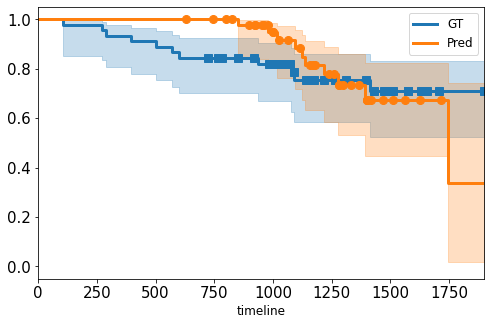

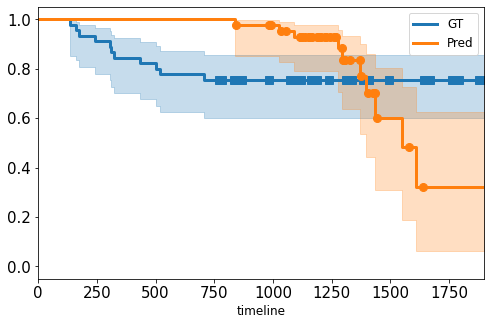

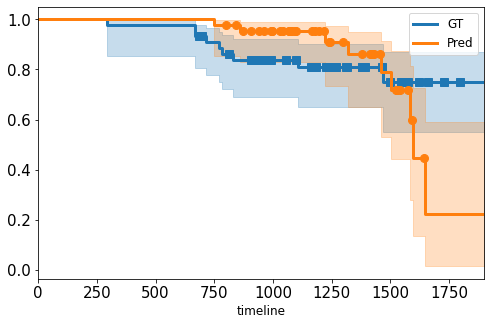

In [29]:
# ExtraTreesRegressor Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= ExtraTreesRegressor(n_estimators=100, random_state=42) 
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 565.9840316146538
1 609.898165174777
2 649.4193647648191
3 493.75850698387836
Concordance index_XGB_fold1: 0.6202020202020202
Concordance index_XGB_fold2: 0.4585858585858586
Concordance index_XGB_fold3: 0.49696969696969695
Concordance index_XGB_fold4: 0.42105263157894735


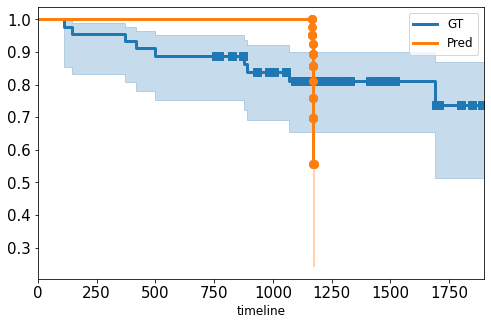

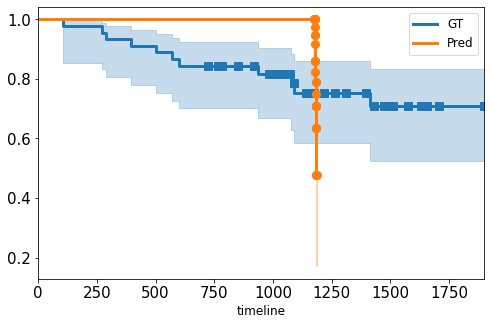

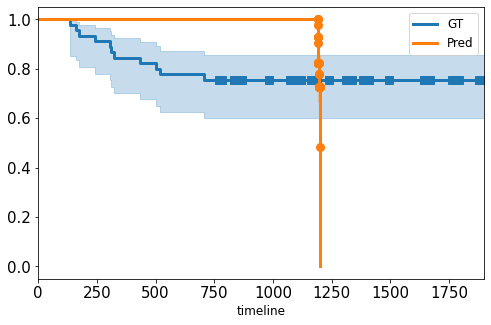

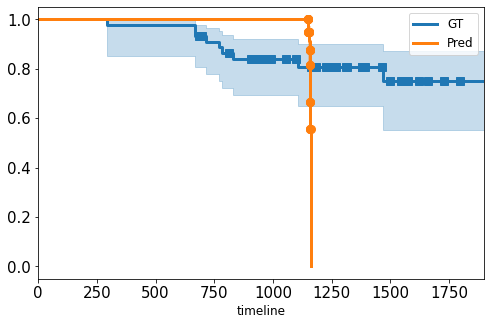

In [30]:
# BaggingRegressor Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 589.7170470281112
1 743.4306710559275
2 765.964459140675
3 666.2956514274358
Concordance index_XGB_fold1: 0.5964646464646465
Concordance index_XGB_fold2: 0.4909090909090909
Concordance index_XGB_fold3: 0.4626262626262626
Concordance index_XGB_fold4: 0.423582995951417


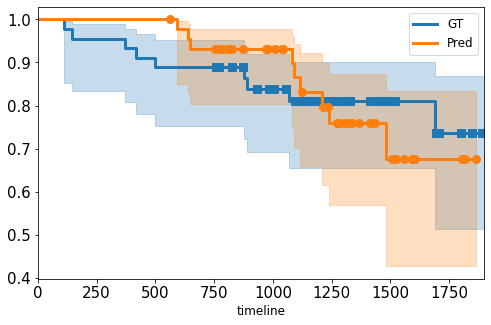

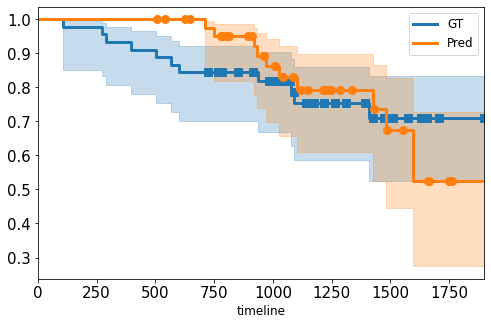

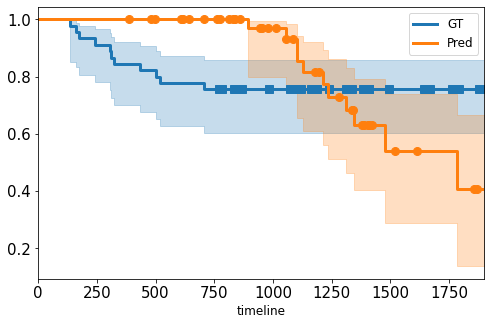

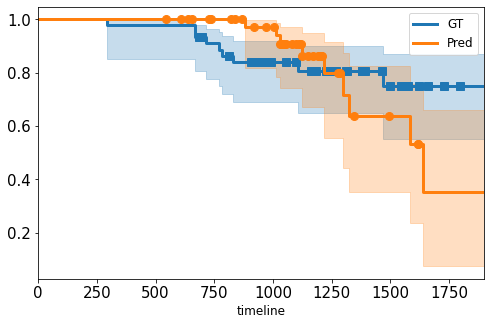

In [31]:
# StackingRegressor Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
  estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
  model= StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,
                                                                                       random_state=42))
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

[22:10:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 601.0219641265415
[22:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 735.1595194304216
[22:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 770.9250655615242
[22:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 577.1736354267175
Concordance index_XGB_fold1: 0.4616161616161616
Concordance index_XGB_fold2: 0.4444444444444444
Concordance index_XGB_fold3: 0.4111111111111111
Concordance index_XGB_fold4: 0.5172064777327935


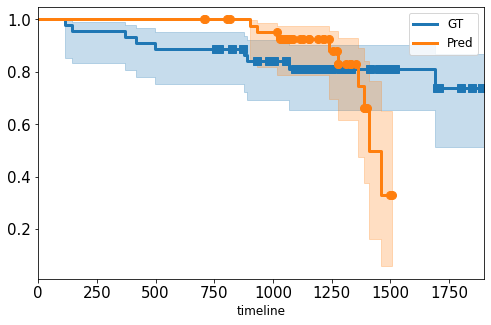

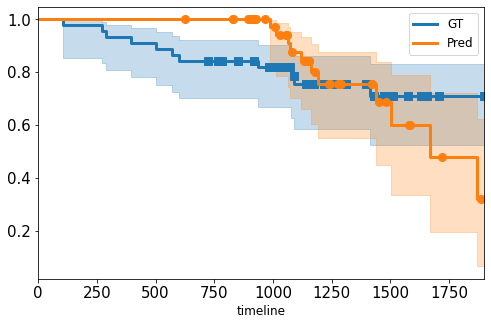

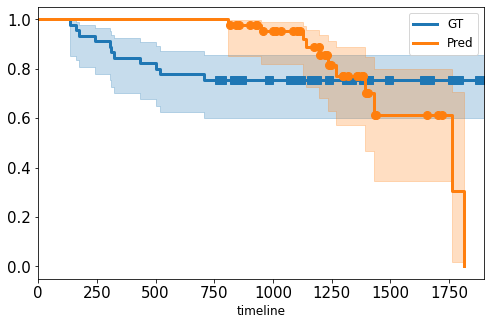

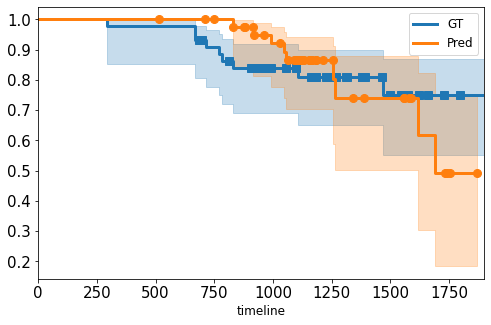

In [32]:
# XGBRegressor Regressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
path='/content/drive/MyDrive/CVSfileHecktor'
patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df = pd.read_csv(patht)
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  params = {'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 
            'reg_alpha': 14.68267919457715, 'subsample': 0.8031450486786944, 
            'colsample_bytree': 0.170759104940733, 'max_depth': 3}
    
  model = XGBRegressor(random_state=0, #tree_method='gpu_hist',#gpu_id=0,#predictor="gpu_predictor",
                       n_estimators=5000,
                       **params)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
import pandas as pd
import os
path='/content/drive/MyDrive/CVSfileHecktor'
pathf=pd.read_csv('/content/drive/MyDrive/CVSfileHecktor/latentfeatures_hectktor.csv')
latentfeature=pathf
labdf='/content/drive/MyDrive/CVSfileHecktor/hecktor2021_patient_endpoint_training.csv'
labeldata=pd.read_csv(labdf)
P=labeldata['Progression']
T=labeldata['Progression free survival']
latentfeature.insert(192,'Progression',P)
latentfeature.insert(193,'Progression free survival',T)

In [ ]:
latentfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,Progression,Progression free survival,f_191
0,CHGJ007,0.017182,0.002647,0.013916,0.028411,0.022093,0.146831,0.230962,0.209331,0.052728,0.022439,0.066935,0.385178,0.253954,0.229793,0.402009,0.383208,0.373360,0.256190,0.401119,0.025713,0.029186,0.193582,0.201060,0.168025,0.004773,0.092306,0.243481,0.081625,0.020572,0.008385,0.384779,0.368868,0.233253,0.089393,0.175141,0.024679,0.380625,0.415659,0.320612,...,0.173611,0.325517,0.039569,0.155022,0.002462,0.393443,0.399085,0.000377,0.004898,0.003244,0.000502,0.006265,0.120063,0.384409,0.395368,0.379350,0.007243,0.402559,0.089249,0.395360,0.090736,0.132309,0.043066,0.006837,0.268706,0.010315,0.089709,0.013767,0.156334,0.146630,0.027893,0.406696,0.187532,0.004626,0.312041,0.146887,0.409736,1,310,0.111851
1,CHGJ008,0.015692,0.002249,0.013440,0.027542,0.021579,0.163872,0.265710,0.247866,0.048986,0.020772,0.072716,0.397886,0.278078,0.233902,0.411534,0.389916,0.378421,0.293430,0.404841,0.025281,0.030585,0.195916,0.202959,0.191161,0.003982,0.103084,0.274187,0.087113,0.017539,0.007858,0.389501,0.377653,0.255099,0.098783,0.197358,0.021692,0.384678,0.417276,0.326544,...,0.191268,0.329373,0.040347,0.168256,0.002091,0.397291,0.402016,0.000270,0.004215,0.002753,0.000373,0.005258,0.143618,0.390134,0.400284,0.390099,0.006225,0.408590,0.089177,0.398886,0.097895,0.143497,0.045514,0.006371,0.295667,0.008896,0.098391,0.013265,0.165532,0.142725,0.028392,0.414258,0.217375,0.003722,0.328719,0.144921,0.409380,0,2037,0.118264
2,CHGJ010,0.016791,0.002451,0.012287,0.027929,0.020429,0.164934,0.257898,0.241920,0.051213,0.022622,0.065055,0.394281,0.270229,0.235192,0.410129,0.392034,0.384534,0.290871,0.408465,0.025973,0.029032,0.198582,0.203594,0.186629,0.004221,0.101485,0.267971,0.077784,0.018375,0.007437,0.387788,0.378531,0.221793,0.098634,0.176050,0.022733,0.385620,0.421353,0.328931,...,0.194393,0.329736,0.041154,0.148881,0.001976,0.399730,0.406119,0.000303,0.004156,0.002956,0.000413,0.005651,0.127051,0.393448,0.401127,0.387321,0.006557,0.410473,0.090932,0.400835,0.093863,0.141649,0.041224,0.006660,0.267689,0.008836,0.093821,0.013746,0.170242,0.144003,0.025944,0.415468,0.214440,0.004025,0.330962,0.146206,0.417162,0,1917,0.120174
3,CHGJ013,0.015954,0.002119,0.013436,0.028046,0.020255,0.169722,0.271343,0.247982,0.048904,0.021352,0.069634,0.398812,0.289652,0.230877,0.409854,0.394815,0.386615,0.302449,0.407820,0.025689,0.030657,0.199161,0.203948,0.193407,0.003954,0.102360,0.285942,0.089277,0.016515,0.007286,0.390607,0.387165,0.261394,0.100304,0.209045,0.020473,0.387063,0.421665,0.336097,...,0.202092,0.330636,0.040641,0.175785,0.001952,0.399581,0.407281,0.000241,0.003984,0.002499,0.000336,0.004919,0.130840,0.398693,0.402099,0.397423,0.006168,0.415649,0.086234,0.408635,0.101347,0.150786,0.042876,0.006191,0.320169,0.008851,0.101911,0.013063,0.169479,0.141645,0.026732,0.412276,0.218787,0.003384,0.326758,0.144895,0.415779,0,1377,0.119332
4,CHGJ015,0.015851,0.002194,0.013181,0.027601,0.020960,0.168940,0.260977,0.243595,0.049384,0.021330,0.070501,0.398497,0.279489,0.234437,0.415066,0.392376,0.383963,0.301981,0.408079,0.025278,0.029878,0.197921,0.203759,0.189436,0.003939,0.101699,0.278951,0.087325,0.017206,0.007544,0.392213,0.382303,0.254845,0.101036,0.199511,0.021362,0.387512,0.419641,0.331465,...,0.199618,0.331390,0.040472,0.170432,0.002011,0.400047,0.405875,0.000257,0.004119,0.002625,0.000353,0.005107,0.135102,0.394539,0.402520,0.393949,0.006178,0.412794,0.088188,0.403815,0.098603,0.146233,0.043713,0.006295,0.302682,0.008918,0.098548,0.013219,0.171050,0.143546,0.027244,0.417709,0.213760,0.003587,0.33091

In [ ]:
latentfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,Progression,Progression free survival,f_191
0,CHGJ007,0.017182,0.002647,0.013916,0.028411,0.022093,0.146831,0.230962,0.209331,0.052728,0.022439,0.066935,0.385178,0.253954,0.229793,0.402009,0.383208,0.373360,0.256190,0.401119,0.025713,0.029186,0.193582,0.201060,0.168025,0.004773,0.092306,0.243481,0.081625,0.020572,0.008385,0.384779,0.368868,0.233253,0.089393,0.175141,0.024679,0.380625,0.415659,0.320612,...,0.173611,0.325517,0.039569,0.155022,0.002462,0.393443,0.399085,0.000377,0.004898,0.003244,0.000502,0.006265,0.120063,0.384409,0.395368,0.379350,0.007243,0.402559,0.089249,0.395360,0.090736,0.132309,0.043066,0.006837,0.268706,0.010315,0.089709,0.013767,0.156334,0.146630,0.027893,0.406696,0.187532,0.004626,0.312041,0.146887,0.409736,1,310,0.111851
1,CHGJ008,0.015692,0.002249,0.013440,0.027542,0.021579,0.163872,0.265710,0.247866,0.048986,0.020772,0.072716,0.397886,0.278078,0.233902,0.411534,0.389916,0.378421,0.293430,0.404841,0.025281,0.030585,0.195916,0.202959,0.191161,0.003982,0.103084,0.274187,0.087113,0.017539,0.007858,0.389501,0.377653,0.255099,0.098783,0.197358,0.021692,0.384678,0.417276,0.326544,...,0.191268,0.329373,0.040347,0.168256,0.002091,0.397291,0.402016,0.000270,0.004215,0.002753,0.000373,0.005258,0.143618,0.390134,0.400284,0.390099,0.006225,0.408590,0.089177,0.398886,0.097895,0.143497,0.045514,0.006371,0.295667,0.008896,0.098391,0.013265,0.165532,0.142725,0.028392,0.414258,0.217375,0.003722,0.328719,0.144921,0.409380,0,2037,0.118264
2,CHGJ010,0.016791,0.002451,0.012287,0.027929,0.020429,0.164934,0.257898,0.241920,0.051213,0.022622,0.065055,0.394281,0.270229,0.235192,0.410129,0.392034,0.384534,0.290871,0.408465,0.025973,0.029032,0.198582,0.203594,0.186629,0.004221,0.101485,0.267971,0.077784,0.018375,0.007437,0.387788,0.378531,0.221793,0.098634,0.176050,0.022733,0.385620,0.421353,0.328931,...,0.194393,0.329736,0.041154,0.148881,0.001976,0.399730,0.406119,0.000303,0.004156,0.002956,0.000413,0.005651,0.127051,0.393448,0.401127,0.387321,0.006557,0.410473,0.090932,0.400835,0.093863,0.141649,0.041224,0.006660,0.267689,0.008836,0.093821,0.013746,0.170242,0.144003,0.025944,0.415468,0.214440,0.004025,0.330962,0.146206,0.417162,0,1917,0.120174
3,CHGJ013,0.015954,0.002119,0.013436,0.028046,0.020255,0.169722,0.271343,0.247982,0.048904,0.021352,0.069634,0.398812,0.289652,0.230877,0.409854,0.394815,0.386615,0.302449,0.407820,0.025689,0.030657,0.199161,0.203948,0.193407,0.003954,0.102360,0.285942,0.089277,0.016515,0.007286,0.390607,0.387165,0.261394,0.100304,0.209045,0.020473,0.387063,0.421665,0.336097,...,0.202092,0.330636,0.040641,0.175785,0.001952,0.399581,0.407281,0.000241,0.003984,0.002499,0.000336,0.004919,0.130840,0.398693,0.402099,0.397423,0.006168,0.415649,0.086234,0.408635,0.101347,0.150786,0.042876,0.006191,0.320169,0.008851,0.101911,0.013063,0.169479,0.141645,0.026732,0.412276,0.218787,0.003384,0.326758,0.144895,0.415779,0,1377,0.119332
4,CHGJ015,0.015851,0.002194,0.013181,0.027601,0.020960,0.168940,0.260977,0.243595,0.049384,0.021330,0.070501,0.398497,0.279489,0.234437,0.415066,0.392376,0.383963,0.301981,0.408079,0.025278,0.029878,0.197921,0.203759,0.189436,0.003939,0.101699,0.278951,0.087325,0.017206,0.007544,0.392213,0.382303,0.254845,0.101036,0.199511,0.021362,0.387512,0.419641,0.331465,...,0.199618,0.331390,0.040472,0.170432,0.002011,0.400047,0.405875,0.000257,0.004119,0.002625,0.000353,0.005107,0.135102,0.394539,0.402520,0.393949,0.006178,0.412794,0.088188,0.403815,0.098603,0.146233,0.043713,0.006295,0.302682,0.008918,0.098548,0.013219,0.171050,0.143546,0.027244,0.417709,0.213760,0.003587,0.33091

In [ ]:
latentfeature.rename(columns={'Progression free survival':'target'}, inplace=True)

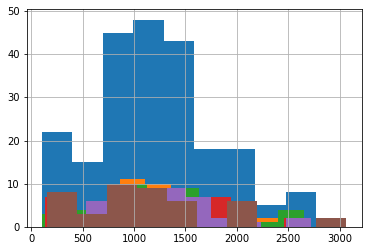

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = latentfeature
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

[09:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 554.4903561601373
[09:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 639.392057398475
[09:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 672.4261234983353
[09:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 527.6390944820616


In [ ]:
# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
#event4=np.array(y_eventf)[4]

In [ ]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

Concordance index_XGB_fold1: 0.5848484848484848
Concordance index_XGB_fold2: 0.5252525252525253
Concordance index_XGB_fold3: 0.5363636363636364
Concordance index_XGB_fold4: 0.5222672064777328


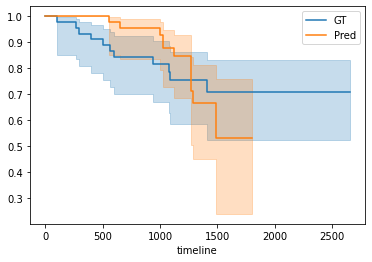

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

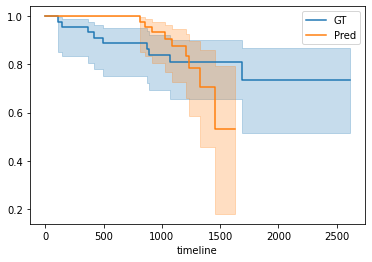

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

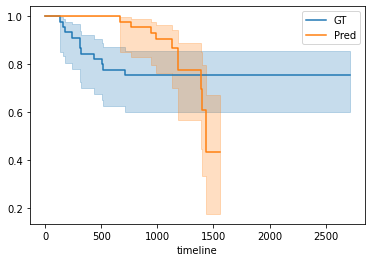

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

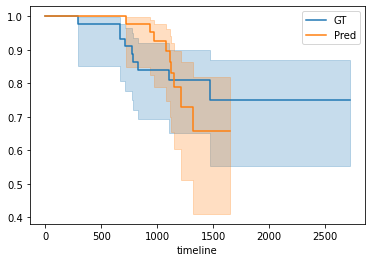

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

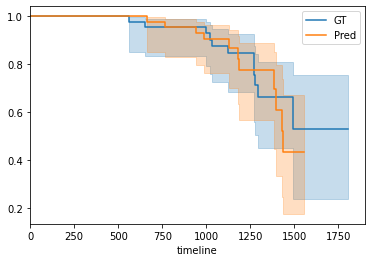

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(pred1, event1, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()
#ax.set_ylim([0.0, 1.0])
ax.set_xlim([0.0, 1900])

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

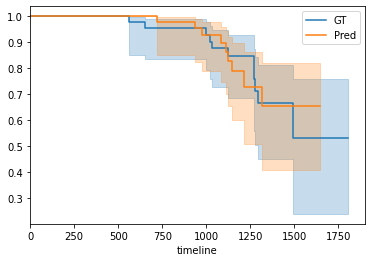

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(pred1, event1, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()
ax.set_xlim([0.0, 1900])
kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

In [ ]:
import pandas as pd
import os
path='/content/drive/MyDrive/CVSfileHecktor'
pathf=pd.read_csv('/content/drive/MyDrive/CVSfileHecktor/lastlayer_feat_hecktor.csv')
lastfeature=pathf

In [ ]:
lastfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143
0,CHGJ007,-7.517321,-8.467215,-8.513254,-8.698412,-8.857738,-8.910445,-8.943001,-8.906604,-8.870392,-8.787102,-8.724111,-8.616116,-8.541186,-8.452964,-8.429233,-8.366144,-8.356366,-8.291943,-8.296104,-8.238682,-8.243151,-8.193043,-8.222549,-8.175195,-8.185174,-8.130013,-8.143685,-8.085955,-8.097809,-8.050486,-8.078727,-8.036322,-8.059227,-8.016657,-8.047659,-8.014236,-8.042257,-8.007129,-8.033331,...,-7.218028,-7.287811,-7.386805,-7.443188,-7.533572,-7.582607,-7.666697,-7.709185,-7.786120,-7.811427,-7.864306,-7.864475,-7.905150,-7.899111,-7.936254,-7.930305,-7.974450,-7.968629,-8.016710,-8.004826,-8.048036,-8.040871,-8.078578,-8.057795,-8.096173,-8.080231,-8.135165,-8.133707,-8.181628,-8.151357,-8.183327,-8.164803,-8.208616,-8.181651,-8.214695,-8.169538,-8.173119,-8.053196,-8.045384,-7.126597
1,CHGJ008,-7.683802,-8.135052,-8.153481,-8.223858,-8.303789,-8.315951,-8.353004,-8.319837,-8.324048,-8.273632,-8.281539,-8.235341,-8.246411,-8.209873,-8.227706,-8.176949,-8.183622,-8.139798,-8.156087,-8.113367,-8.121806,-8.081960,-8.097019,-8.062227,-8.077236,-8.048395,-8.075448,-8.047117,-8.066898,-8.042371,-8.067255,-8.042924,-8.059982,-8.031995,-8.046880,-8.019599,-8.040806,-8.022655,-8.038469,...,-7.915476,-7.922136,-7.969650,-7.966496,-8.017434,-8.017156,-8.058480,-8.036119,-8.068726,-8.045216,-8.076925,-8.048114,-8.084498,-8.065784,-8.108162,-8.085933,-8.127543,-8.110157,-8.154586,-8.139464,-8.180134,-8.162575,-8.202653,-8.180817,-8.209786,-8.178550,-8.207985,-8.191620,-8.230564,-8.220807,-8.271929,-8.247563,-8.270304,-8.235515,-8.245650,-8.209352,-8.203735,-8.140244,-8.210161,-7.300578
2,CHGJ010,-8.257301,-8.059567,-7.990803,-8.086707,-8.225202,-8.286564,-8.349352,-8.341010,-8.354363,-8.328756,-8.342839,-8.313148,-8.316041,-8.282685,-8.295352,-8.271245,-8.286003,-8.263865,-8.277118,-8.246711,-8.273641,-8.254636,-8.268053,-8.240821,-8.260031,-8.236711,-8.256396,-8.235326,-8.258673,-8.241766,-8.266410,-8.249516,-8.273986,-8.253621,-8.273449,-8.253797,-8.278251,-8.262142,-8.276724,...,-8.286670,-8.290813,-8.327236,-8.326781,-8.364759,-8.358528,-8.384975,-8.366294,-8.384082,-8.356073,-8.366461,-8.337849,-8.349748,-8.318260,-8.325590,-8.300199,-8.319569,-8.298929,-8.316368,-8.290595,-8.314487,-8.293219,-8.308311,-8.281547,-8.319916,-8.307797,-8.325330,-8.302131,-8.325345,-8.290750,-8.305173,-8.259790,-8.257285,-8.194950,-8.186791,-8.129108,-8.110393,-8.034371,-8.292694,-7.856173
3,CHGJ013,-8.021438,-8.215602,-8.152780,-8.284893,-8.425662,-8.473149,-8.518524,-8.503143,-8.501078,-8.459977,-8.460469,-8.420499,-8.408777,-8.372013,-8.375021,-8.336830,-8.340338,-8.312404,-8.322250,-8.289376,-8.301921,-8.275942,-8.291136,-8.264295,-8.281152,-8.262895,-8.290273,-8.273500,-8.297922,-8.282863,-8.307242,-8.284968,-8.303709,-8.284683,-8.308757,-8.294594,-8.321325,-8.304393,-8.319209,...,-8.158704,-8.166357,-8.202542,-8.203902,-8.239321,-8.238369,-8.266223,-8.251597,-8.270884,-8.249800,-8.267765,-8.252643,-8.284534,-8.274263,-8.299130,-8.280480,-8.306044,-8.289276,-8.313334,-8.294202,-8.317640,-8.300358,-8.323935,-8.303214,-8.320106,-8.302923,-8.335535,-8.318891,-8.347610,-8.338334,-8.370489,-8.356055,-8.379559,-8.341596,-8.345322,-8.308146,-8.287323,-8.193943,-8.393070,-7.425754
4,CHGJ015,-8.079620,-8.035719,-7.958462,-8.078260,-8.230578,-8.298374,-8.351585,-8.334088,-8.327169,-8.289190,-8.302470,-8.256535,-8.234167,-8.214702,-8.226695,-8.201663,-8.225394,-8.211002,-8.233793,-8.219454,-8.243158,-8.229738,-8.250956,-8.228767,-8.246034,-8.225575,-8.243726,-8.222157,-8.243743,-8.228487,-8.255259,-8.240725,-8.263817,-8.

In [ ]:
labdf='/content/drive/MyDrive/CVSfileHecktor/hecktor2021_patient_endpoint_training.csv'
labeldata=pd.read_csv(labdf)
P=labeldata['Progression']
T=labeldata['Progression free survival']
lastfeature.insert(145,'Progression',P)
lastfeature.insert(146,'Progression free survival',T)

In [ ]:
lastfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,Progression,Progression free survival
0,CHGJ007,-7.517321,-8.467215,-8.513254,-8.698412,-8.857738,-8.910445,-8.943001,-8.906604,-8.870392,-8.787102,-8.724111,-8.616116,-8.541186,-8.452964,-8.429233,-8.366144,-8.356366,-8.291943,-8.296104,-8.238682,-8.243151,-8.193043,-8.222549,-8.175195,-8.185174,-8.130013,-8.143685,-8.085955,-8.097809,-8.050486,-8.078727,-8.036322,-8.059227,-8.016657,-8.047659,-8.014236,-8.042257,-8.007129,-8.033331,...,-7.386805,-7.443188,-7.533572,-7.582607,-7.666697,-7.709185,-7.786120,-7.811427,-7.864306,-7.864475,-7.905150,-7.899111,-7.936254,-7.930305,-7.974450,-7.968629,-8.016710,-8.004826,-8.048036,-8.040871,-8.078578,-8.057795,-8.096173,-8.080231,-8.135165,-8.133707,-8.181628,-8.151357,-8.183327,-8.164803,-8.208616,-8.181651,-8.214695,-8.169538,-8.173119,-8.053196,-8.045384,-7.126597,1,310
1,CHGJ008,-7.683802,-8.135052,-8.153481,-8.223858,-8.303789,-8.315951,-8.353004,-8.319837,-8.324048,-8.273632,-8.281539,-8.235341,-8.246411,-8.209873,-8.227706,-8.176949,-8.183622,-8.139798,-8.156087,-8.113367,-8.121806,-8.081960,-8.097019,-8.062227,-8.077236,-8.048395,-8.075448,-8.047117,-8.066898,-8.042371,-8.067255,-8.042924,-8.059982,-8.031995,-8.046880,-8.019599,-8.040806,-8.022655,-8.038469,...,-7.969650,-7.966496,-8.017434,-8.017156,-8.058480,-8.036119,-8.068726,-8.045216,-8.076925,-8.048114,-8.084498,-8.065784,-8.108162,-8.085933,-8.127543,-8.110157,-8.154586,-8.139464,-8.180134,-8.162575,-8.202653,-8.180817,-8.209786,-8.178550,-8.207985,-8.191620,-8.230564,-8.220807,-8.271929,-8.247563,-8.270304,-8.235515,-8.245650,-8.209352,-8.203735,-8.140244,-8.210161,-7.300578,0,2037
2,CHGJ010,-8.257301,-8.059567,-7.990803,-8.086707,-8.225202,-8.286564,-8.349352,-8.341010,-8.354363,-8.328756,-8.342839,-8.313148,-8.316041,-8.282685,-8.295352,-8.271245,-8.286003,-8.263865,-8.277118,-8.246711,-8.273641,-8.254636,-8.268053,-8.240821,-8.260031,-8.236711,-8.256396,-8.235326,-8.258673,-8.241766,-8.266410,-8.249516,-8.273986,-8.253621,-8.273449,-8.253797,-8.278251,-8.262142,-8.276724,...,-8.327236,-8.326781,-8.364759,-8.358528,-8.384975,-8.366294,-8.384082,-8.356073,-8.366461,-8.337849,-8.349748,-8.318260,-8.325590,-8.300199,-8.319569,-8.298929,-8.316368,-8.290595,-8.314487,-8.293219,-8.308311,-8.281547,-8.319916,-8.307797,-8.325330,-8.302131,-8.325345,-8.290750,-8.305173,-8.259790,-8.257285,-8.194950,-8.186791,-8.129108,-8.110393,-8.034371,-8.292694,-7.856173,0,1917
3,CHGJ013,-8.021438,-8.215602,-8.152780,-8.284893,-8.425662,-8.473149,-8.518524,-8.503143,-8.501078,-8.459977,-8.460469,-8.420499,-8.408777,-8.372013,-8.375021,-8.336830,-8.340338,-8.312404,-8.322250,-8.289376,-8.301921,-8.275942,-8.291136,-8.264295,-8.281152,-8.262895,-8.290273,-8.273500,-8.297922,-8.282863,-8.307242,-8.284968,-8.303709,-8.284683,-8.308757,-8.294594,-8.321325,-8.304393,-8.319209,...,-8.202542,-8.203902,-8.239321,-8.238369,-8.266223,-8.251597,-8.270884,-8.249800,-8.267765,-8.252643,-8.284534,-8.274263,-8.299130,-8.280480,-8.306044,-8.289276,-8.313334,-8.294202,-8.317640,-8.300358,-8.323935,-8.303214,-8.320106,-8.302923,-8.335535,-8.318891,-8.347610,-8.338334,-8.370489,-8.356055,-8.379559,-8.341596,-8.345322,-8.308146,-8.287323,-8.193943,-8.393070,-7.425754,0,1377
4,CHGJ015,-8.079620,-8.035719,-7.958462,-8.078260,-8.230578,-8.298374,-8.351585,-8.334088,-8.327169,-8.289190,-8.302470,-8.256535,-8.234167,-8.214702,-8.226695,-8.201663,-8.225394,-8.211002,-8.233793,-8.219454,-8.243158,-8.229738,-8.250956,-8.228767,-8.246034,-8.225575,-8.243726,-8.222157,-8.243743,-8.228487,-8.255259,-8.240725,-8.263817,-8.247068,-8.266474,-8.246023,

In [ ]:
lastfeature.rename(columns={'Progression free survival':'target'}, inplace=True)

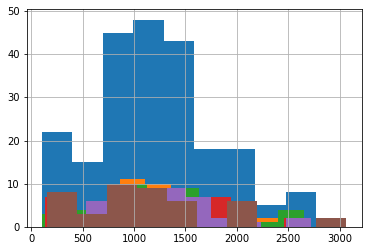

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = lastfeature
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

[09:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 591.4181834299488
[09:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 626.0283275892139
[09:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 663.8027048719865
[09:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 605.9805824213707


In [ ]:
# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
#event4=np.array(y_eventf)[4]

In [ ]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

Concordance index_XGB_fold1: 0.48282828282828283
Concordance index_XGB_fold2: 0.5545454545454546
Concordance index_XGB_fold3: 0.5121212121212121
Concordance index_XGB_fold4: 0.4726720647773279


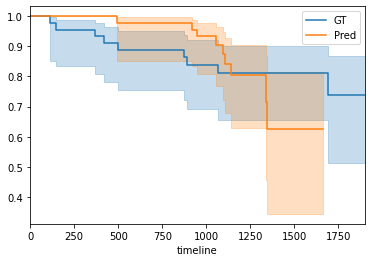

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()
ax.set_xlim([0.0, 1900])
kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

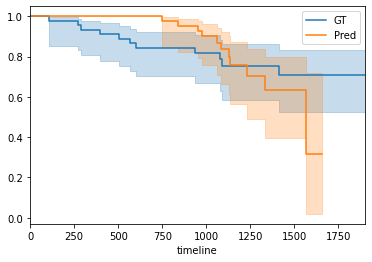

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()
ax.set_xlim([0.0, 1900])
kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

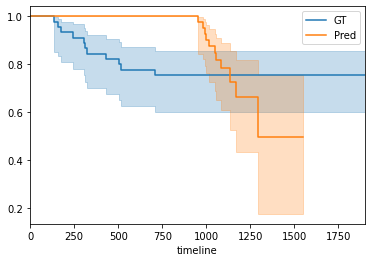

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()
ax.set_xlim([0.0, 1900])
kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

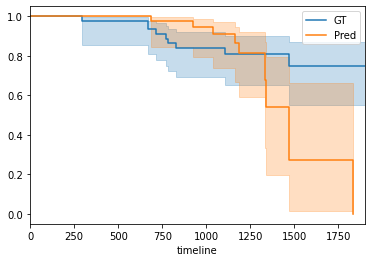

In [ ]:
from lifelines import KaplanMeierFitter
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
ax = kmf.plot()
ax.set_xlim([0.0, 1900])
kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

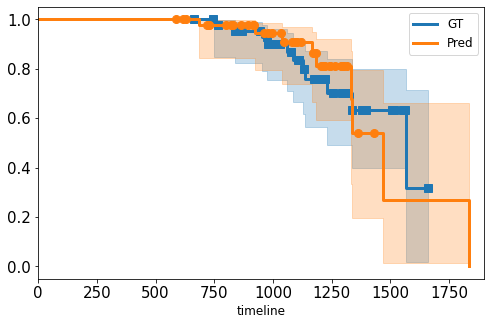

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(pred1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
import pandas as pd
import os
path='/content/drive/MyDrive/CVSfileHecktor'
pathf=pd.read_csv('/content/drive/MyDrive/CVSfileHecktor/Radiomics_features_hecktor2021.csv')
radiofeature=pathf

In [ ]:
radiofeature

,PatientID,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColum,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,Sphericity,SurfaceArea,SurfaceVolumeRatio,VoxelVolume,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,InterquartileRange,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,glcm_Autocorrelation,glcm_ClusterProminence,glcm_ClusterShade,glcm_ClusterTendency,glcm_Contrast,glcm_Correlation,...,gldm_SmallDependenceLowGrayLevelEmphasi,glrlm_GrayLevelNonUniformity,glrlm_GrayLevelNonUniformityNormalized,glrlm_GrayLevelVariance,glrlm_HighGrayLevelRunEmphasis,glrlm_LongRunEmphasis,glrlm_LongRunHighGrayLevelEmphasi,glrlm_LongRunLowGrayLevelEmphasis,glrlm_LowGrayLevelRunEmphasis,glrlm_RunEntropy,glrlm_RunLengthNonUniformity,glrlm_RunLengthNonUniformityNormalized,glrlm_RunPercentage,glrlm_RunVariance,glrlm_ShortRunEmphasis,glrlm_ShortRunHighGrayLevelEmphasis,glrlm_ShortRunLowGrayLevelEmphasis,glszm_GrayLevelNonUniformity,glszm_GrayLevelNonUniformityNormalized,glszm_GrayLevelVariance,glszm_HighGrayLevelZoneEmphasis,glszm_LargeAreaEmphasis,glszm_LargeAreaHighGrayLevelEmphasis,glszm_LargeAreaLowGrayLevelEmphasis,glszm_LowGrayLevelZoneEmphasis,glszm_SizeZoneNonUniformity,glszm_SizeZoneNonUniformityNormalized,glszm_SmallAreaEmphasis,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Progression,Progression free survival
0,CHGJ007,0.850691,0.719053,35.365014,49.182734,56.293872,59.236813,49.729267,61.212744,48102.875000,41.839310,0.648745,9859.555466,0.204968,48180.0,18.037995,61.479379,1.115449e+08,1.808980,17.284489,17.284489,21.406229,222.244781,15.519158,40.843689,44.484383,-396.458557,618.703339,7.617330,48.116206,-2.660773,1.115449e+08,0.389656,646.962410,330.023191,1.479838e+02,-12.277906,3.481183,0.598885,0.705288,...,0.000077,5828.700797,0.289549,1.874893,326.068860,12.356960,4080.417016,0.037804,0.003264,4.426718,6243.447066,0.304740,0.415525,6.075458,0.557688,179.169162,0.001912,54.791045,0.102222,10.889616,260.423507,1.640119e+06,5.433728e+08,4961.405631,0.006895,126.981343,0.236905,0.498348,115.894019,0.003521,6.206172,0.011125,1.632039e+06,6.851898,0.000198,100.601263,0.001518,0.188724,1,310
1,CHGJ008,0.691639,0.686041,17.612623,25.672845,30.413813,28.792360,22.472205,31.638584,5291.583333,17.756346,0.744359,1972.842025,0.372826,5320.0,29.296611,64.273505,1.320701e+07,1.507097,17.613300,17.613300,6.782951,145.559540,11.604022,47.188469,47.752563,-63.102901,208.662441,7.375090,49.824908,-0.363823,1.320701e+07,0.417654,255.769796,29.619700,1.090491e+01,-0.315762,1.534479,0.342274,0.634260,...,0.000615,788.840453,0.371803,0.694000,29.082617,11.694873,349.630234,0.413502,0.039354,4.088482,579.937217,0.265253,0.397715,4.579681,0.503815,14.376104,0.021371,8.377778,0.186173,3.137778,26.822222,2.580176e+05,7.536459e+06,9127.911422,0.083423,5.844444,0.129877,0.245172,6.657075,0.022222,5.013858,0.008459,2.440411e+05,8.167909,0.001714,10.934231,0.004034,0.085904,0,2037
2,CHGJ010,0.971957,0.924111,14.285181,15.458301,19.209373,19.416488,17.720045,19.442222,2284.583333,15.024809,0.811556,1033.642425,0.452442,2303.0,41.853915,66.368690,7.246529e+06,1.015042,11.951128,11.951128,18.286250,80.866188,8.574871,54.516756,56.916710,-61.508060,142.374249,4.969688,56.094210,-2.921513,7.246529e+06,0.611189,174.483674,33.174361,1.693691e+01,-3.115414,1.054310,0.314817,0.540617,...,0.001000,335.072066,0.422144,0.598853,30.075600,17.174194,600.235929,0.504346,0.038922,3.741196,208.855065,0.256349,0.343398,7.730747,0.508042,13.91

In [ ]:
radiofeature.rename(columns={'Progression free survival':'target'}, inplace=True)

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

features_use=[c for c in radiofeature.columns if c not in ('PatientID','Progression','target')]
#self.useful_features = [c for c in self.df.columns if c not in ("participant_id", "target", "kfold")]

dataset_X = radiofeature[features_use]
scaler = MinMaxScaler(feature_range=(0,1))
X_ = scaler.fit_transform(dataset_X)
X_train = pd.DataFrame(X_, columns=dataset_X.columns)

# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns



# Split into train (2/3) and test (1/3) sets
# test_size = 0.20
# seed = 7
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Feature selection
# Remove low variance features
# Identify some low variance features, those with variance 
# less than 0.1 and remove them.

# # Check the shape before we remove anything
# X_test.shape
X_train.var()
sel = VarianceThreshold(threshold=(0.01))
sel.fit(X_train)

selected_features = list(X_train.columns[sel.get_support()])
print("Feature selection", sel.get_support())
print("Selected features:", selected_features)
print("Removed features:", list(X_train.columns[~sel.get_support()]))

# Transform (remove low variance features)
X_train = sel.transform(X_train)
#X_test = sel.transform(X_test)

# Turn back into a dataframe
X_train = pd.DataFrame(X_train, columns=selected_features)
#X_test = pd.DataFrame(X_test, columns=selected_features)

# Confirm the new shape
print(X_train.shape)

# Correlated features
# Remove highly correlated features

# Get a set of correlated features, based on threshold correlation of 0.85
cf = correlatedFeatures(X_train, 0.85)
cf

# Remove the correlated features
X_train = X_train.drop(cf, axis=1)
#X_test = X_test.drop(cf, axis=1)

# Confirm the new shape
print(X_train.shape)

Feature selection [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True False  True False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True False  True  True False  True  True  True False  True  True  True
  True  True  True False  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False False False]
Selected features: ['Elongation', 'Flatness', 'LeastAxisLength', 'MajorAxisLength', 'Maximum2DDiameterColum', 'Maximum2DDiameterRow', 'Maximum2DDiameterSlice', 'Maximum3DDiameter', 'MeshVolume', 'MinorAxisLength', 'Sphericity', 'SurfaceArea', 'SurfaceVolumeRatio', 'VoxelVolume', 'firstorder_90Percentile', 'firstorder_Entro

In [ ]:
X_train

,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Sphericity,SurfaceVolumeRatio,firstorder_90Percentile,firstorder_Entropy,firstorder_Kurtosis,firstorder_Maximum,firstorder_Mean,firstorder_Minimum,firstorder_Skewness,glcm_Correlation,glcm_Idmn,glcm_Imc1,gldm_DependenceNonUniformity,gldm_DependenceNonUniformityNormalized,gldm_DependenceVariance,gldm_LargeDependenceHighGrayLevelEmphasis,gldm_LargeDependenceLowGrayLevelEmphasis,gldm_SmallDependenceLowGrayLevelEmphasi,glrlm_LongRunEmphasis,glrlm_RunEntropy,glszm_GrayLevelNonUniformityNormalized,glszm_LargeAreaLowGrayLevelEmphasis,glszm_SizeZoneNonUniformityNormalized,glszm_ZoneEntropy,ngtdm_Busyness,ngtdm_Coarseness
0,0.806420,0.696127,0.575574,0.541071,0.559819,0.092490,0.137344,0.349069,0.056111,0.052296,0.647785,0.625587,0.500660,0.761927,0.961589,0.352859,0.129823,0.022047,0.446009,0.180843,0.016751,0.007563,0.114200,0.623249,0.239327,0.058289,0.290057,0.670212,0.165536,0.008647
1,0.552523,0.647205,0.216527,0.201733,0.774392,0.320693,0.152573,0.258596,0.010444,0.028200,0.696876,0.932581,0.629545,0.647279,0.807051,0.361166,0.013329,0.032966,0.384028,0.014499,0.208074,0.123873,0.106843,0.437192,0.490556,0.107242,0.053742,0.406075,0.197535,0.093407
2,1.000000,1.000000,0.149228,0.054297,0.925195,0.428930,0.163992,0.111130,0.046367,0.007872,0.753576,0.934050,0.486029,0.496129,0.713977,0.587873,0.007219,0.117581,0.619465,0.021611,0.205540,0.207011,0.167729,0.246157,0.588046,0.043180,0.142639,0.163372,0.082162,0.257401
3,0.465179,0.316041,0.129838,0.247011,0.809194,0.321076,0.117151,0.247294,0.027704,0.021097,0.679775,0.890350,0.590433,0.460902,0.788031,0.581640,0.012857,0.040156,0.321329,0.022474,0.096640,0.126055,0.087311,0.298929,0.468343,0.064641,0.183732,0.299812,0.145332,0.079284
4,0.762084,0.607350,0.119884,0.112218,0.822685,0.429129,0.139790,0.214582,0.034405,0.011361,0.689746,0.874332,0.566108,0.280658,0.792890,0.738289,0.005613,0.025276,0.413201,0.030101,0.071596,0.127884,0.080026,0.183355,0.826566,0.020361,0.084653,0.247297,0.112317,0.144655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.261898,0.075835,0.132336,0.477270,0.302776,0.473152,0.550260,0.772068,0.047927,0.095402,0.822176,0.213807,0.577672,0.698698,0.924382,0.563051,0.029727,0.181158,0.006455,0.167221,0.000274,0.039209,0.001924,0.584684,0.104522,0.000063,0.498520,0.739094,0.005410,0.089002
220,0.823544,0.723372,1.000000,0.934110,0.491539,0.000000,0.170863,0.560681,0.174339,0.186875,0.533182,0.017045,0.295822,0.955489,0.957612,0.676650,0.663768,0.085089,0.152587,0.488098,0.001119,0.018335,0.018696,0.513282,0.087034,0.006211,0.597355,0.897184,0.096058,0.000000
221,0.328192,0.220681,0.156070,0.361219,0.588664,0.334362,0.343137,0.638307,0.164733,0.068050,0.692254,0.099369,0.352310,0.650552,0.926079,0.618502,0.024527,0.101803,0.131581,0.325118,0.000472,0.038490,0.009731,0.511290,0.117482,0.000170,0.538460,0.723106,0.004792,0.069645
222,0.705752,0.329182,0.358022,0.584612,0.064932,0.397408,0.656968,0.984019,0.120153,1.000000,0.902713,0.041992,0.883306,0.959866,0.962719,0.413468,0.081694,0.161093,0.064316,0.239589,0.000000,0.036683,0.000934,1.000000,0.000000,0.000059,0.797727,1.000000,0.002219,0.030756


In [ ]:
ytrain=radiofeature[['target', 'Progression']]
radiof_df = pd.merge(X_train,ytrain, left_index=True, right_index=True)
radiof_df.insert(0,'PatientID',radiofeature['PatientID'])

In [ ]:
radiof_df

,PatientID,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Sphericity,SurfaceVolumeRatio,firstorder_90Percentile,firstorder_Entropy,firstorder_Kurtosis,firstorder_Maximum,firstorder_Mean,firstorder_Minimum,firstorder_Skewness,glcm_Correlation,glcm_Idmn,glcm_Imc1,gldm_DependenceNonUniformity,gldm_DependenceNonUniformityNormalized,gldm_DependenceVariance,gldm_LargeDependenceHighGrayLevelEmphasis,gldm_LargeDependenceLowGrayLevelEmphasis,gldm_SmallDependenceLowGrayLevelEmphasi,glrlm_LongRunEmphasis,glrlm_RunEntropy,glszm_GrayLevelNonUniformityNormalized,glszm_LargeAreaLowGrayLevelEmphasis,glszm_SizeZoneNonUniformityNormalized,glszm_ZoneEntropy,ngtdm_Busyness,ngtdm_Coarseness,target,Progression
0,CHGJ007,0.806420,0.696127,0.575574,0.541071,0.559819,0.092490,0.137344,0.349069,0.056111,0.052296,0.647785,0.625587,0.500660,0.761927,0.961589,0.352859,0.129823,0.022047,0.446009,0.180843,0.016751,0.007563,0.114200,0.623249,0.239327,0.058289,0.290057,0.670212,0.165536,0.008647,310,1
1,CHGJ008,0.552523,0.647205,0.216527,0.201733,0.774392,0.320693,0.152573,0.258596,0.010444,0.028200,0.696876,0.932581,0.629545,0.647279,0.807051,0.361166,0.013329,0.032966,0.384028,0.014499,0.208074,0.123873,0.106843,0.437192,0.490556,0.107242,0.053742,0.406075,0.197535,0.093407,2037,0
2,CHGJ010,1.000000,1.000000,0.149228,0.054297,0.925195,0.428930,0.163992,0.111130,0.046367,0.007872,0.753576,0.934050,0.486029,0.496129,0.713977,0.587873,0.007219,0.117581,0.619465,0.021611,0.205540,0.207011,0.167729,0.246157,0.588046,0.043180,0.142639,0.163372,0.082162,0.257401,1917,0
3,CHGJ013,0.465179,0.316041,0.129838,0.247011,0.809194,0.321076,0.117151,0.247294,0.027704,0.021097,0.679775,0.890350,0.590433,0.460902,0.788031,0.581640,0.012857,0.040156,0.321329,0.022474,0.096640,0.126055,0.087311,0.298929,0.468343,0.064641,0.183732,0.299812,0.145332,0.079284,1377,0
4,CHGJ015,0.762084,0.607350,0.119884,0.112218,0.822685,0.429129,0.139790,0.214582,0.034405,0.011361,0.689746,0.874332,0.566108,0.280658,0.792890,0.738289,0.005613,0.025276,0.413201,0.030101,0.071596,0.127884,0.080026,0.183355,0.826566,0.020361,0.084653,0.247297,0.112317,0.144655,1072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,CHUP019,0.261898,0.075835,0.132336,0.477270,0.302776,0.473152,0.550260,0.772068,0.047927,0.095402,0.822176,0.213807,0.577672,0.698698,0.924382,0.563051,0.029727,0.181158,0.006455,0.167221,0.000274,0.039209,0.001924,0.584684,0.104522,0.000063,0.498520,0.739094,0.005410,0.089002,161,1
220,CHUP020,0.823544,0.723372,1.000000,0.934110,0.491539,0.000000,0.170863,0.560681,0.174339,0.186875,0.533182,0.017045,0.295822,0.955489,0.957612,0.676650,0.663768,0.085089,0.152587,0.488098,0.001119,0.018335,0.018696,0.513282,0.087034,0.006211,0.597355,0.897184,0.096058,0.000000,394,1
221,CHUP021,0.328192,0.220681,0.156070,0.361219,0.588664,0.334362,0.343137,0.638307,0.164733,0.068050,0.692254,0.099369,0.352310,0.650552,0.926079,0.618502,0.024527,0.101803,0.131581,0.325118,0.000472,0.038490,0.009731,0.511290,0.117482,0.000170,0.538460,0.723106,0.004792,0.069645,874,0
222,CHUP022,0.705752,0.329182,0.358022,0.584612,0.064932,0.397408,0.656968,0.984019,0.120153,1.000000,0.902713,0.041992,0.883306,0.959866,0.962719,0.413468,0.081694,0.161093,0.064316,0.239589,0.000000,0.036683,0.000934,1.000000,0.000000,0.000059,0.797727,1.000000,0.002219,0.030756,2401,0


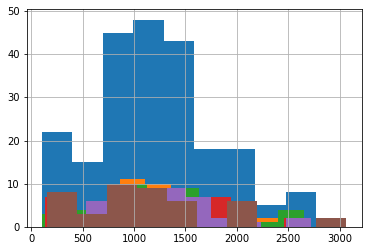

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = radiof_df
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("PatientID", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

[10:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 565.3451771977603
[10:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 664.1553695643273
[10:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 654.5107780503536
[10:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 570.4416534712459


In [ ]:
# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
#event4=np.array(y_eventf)[4]

In [ ]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

Concordance index_XGB_fold1: 0.5272727272727272
Concordance index_XGB_fold2: 0.509090909090909
Concordance index_XGB_fold3: 0.5404040404040404
Concordance index_XGB_fold4: 0.39979757085020245


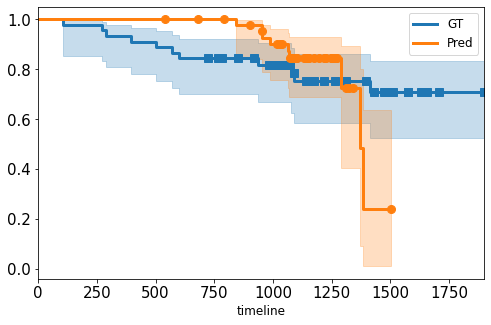

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

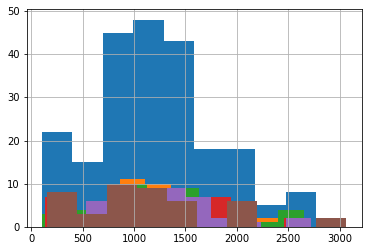

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = radiofeature
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("PatientID", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 554.2944970952417
[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 676.4758570939056
[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 619.9074498339312
[10:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 538.09197707537


In [ ]:
# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
#event4=np.array(y_eventf)[4]

In [ ]:
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

Concordance index_XGB_fold1: 0.5646464646464646
Concordance index_XGB_fold2: 0.498989898989899
Concordance index_XGB_fold3: 0.592929292929293
Concordance index_XGB_fold4: 0.5131578947368421


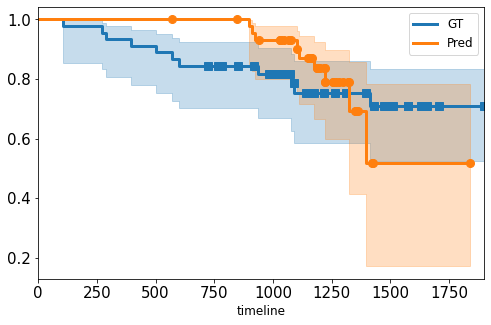

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)